# Getting started with qplot

## Intro

try `?qplot` and `??qqplot`, or `!?qplot`, see help documentation for this quick plot function

## Datasets

`diamonds.csv`, import `ggplot2` to use this dataset

In [1]:
library(ggplot2)
help(qplot)
head(diamonds)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


and `dsmall`, a random sample of $100$ diamonds

In [2]:
set.seed(1410) # Make the sample reproducible for other learners

In [3]:
dsmall <- diamonds[sample(nrow(diamonds), 100), ]

## Basic use

put the data in the see the default graph type. Arguments:

- `data=datasetName`: data to show. If not assigned, `qplot` will find `x` and `y` in workspace
- `x=colName`: data for x coordinates
- `y=colName`: data for y coordinates

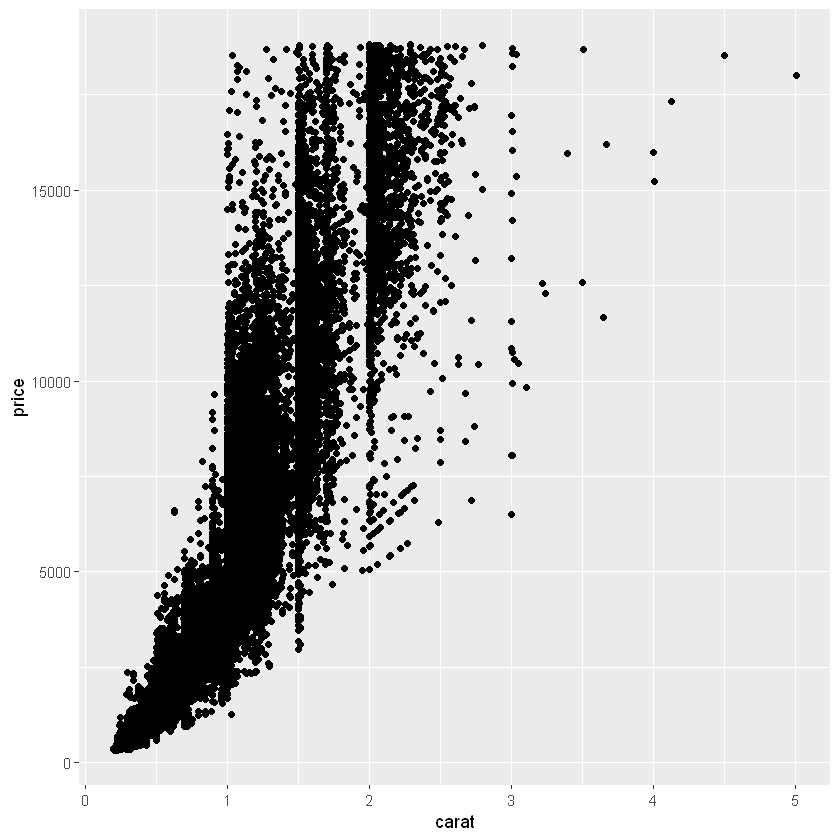

In [5]:
# x: carat
# y: price
qplot(carat, price, data = diamonds)

to resize the figure, use library `repr` and its function `option()`

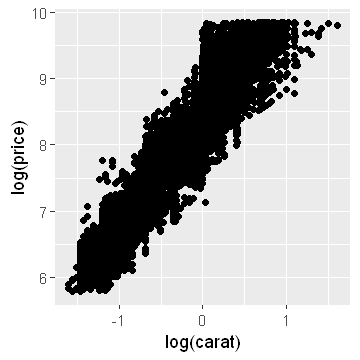

In [14]:
# use library repr to limit the figure size
library(repr)
options(repr.plot.width=3, repr.plot.height=3)
qplot(log(carat), log(price), data = diamonds)

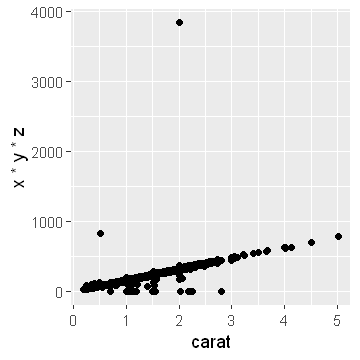

In [16]:
qplot(carat,x*y*z, data = diamonds)

## Colour, size, shape and other aesthetic attributes

additional arguments for `qplot`:

- `colour=colName`: points with different colors based on their value in `colName`
- `shape=colName`: points with different shapes based on their value in `colName`

Warning message:
"Using shapes for an ordinal variable is not advised"

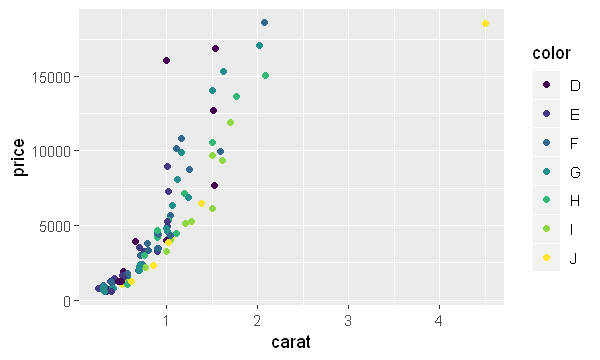

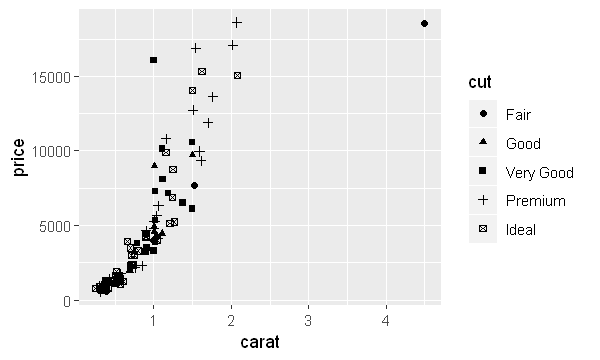

In [23]:
options(repr.plot.width=5, repr.plot.height=3)
qplot(carat, price, data = dsmall, colour = color)
qplot(carat, price, data = dsmall, shape = cut)

other possible arguments

- `size=I(sizeNum)`: adjust the size of the points
- `color=I("colorName")`: change the color of the points

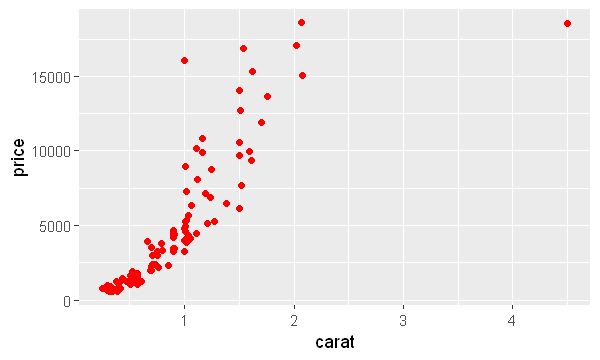

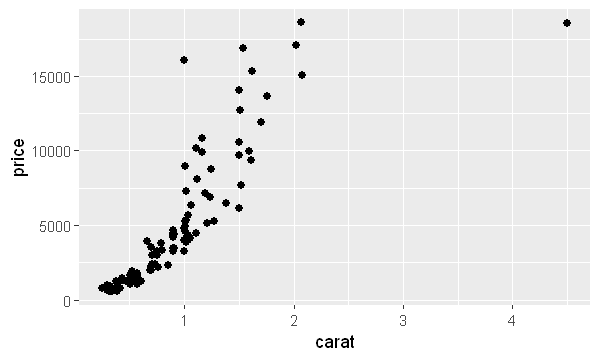

In [28]:
qplot(carat, price, data = dsmall, colour = I("red"))
qplot(carat, price, data = dsmall, size = I(2))

alpha aesthetic, to draw transparent points

- `alpha=I(Alpha)`: Alpha is a number between $0$ and $1$

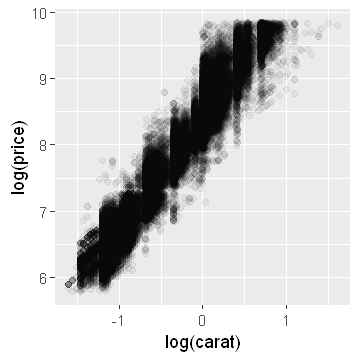

In [29]:
options(repr.plot.width=3, repr.plot.height=3)
qplot(log(carat), log(price), data = diamonds, alpha = I(1/20))

## Plot geoms

**Geoms**, the geometric objects.

- `geom="points"`: scatterplot, default
- `geom="smooth"`: fits a smoother; display the smooth and standard error
- `geom="boxplot"`: box-and-whisker plot to summarise the distribution
- `geom="path"` and `geom='line"` draw lines between the points

two basic plot for 1d data,

- `geom="histogram"`: histogram, default
- `geom="freqpoly"`: frequency polygon
- `geom="density"`: density plot
- `geom="bar"`: bar plot, for discrete variables

### Adding a smoother to a plot

Since smoother is regardded as a independent layer, and we want to put this layer above the "point" layer, so we have

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


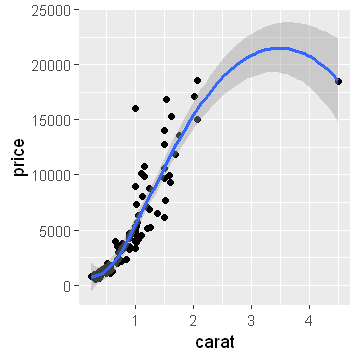

In [35]:
qplot(carat, price, data = dsmall, geom =c("point","smooth"))

here `c("point","smoother")` is to combine Values into a Vector or List

clearly, the smoother layer covers some part of the points layer

and to disable showing the standard error, add another argument: `se=FALSE`, which is an argument for function `geom_smooth()`

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


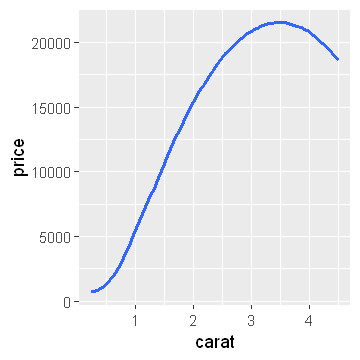

In [36]:
qplot(carat, price, data = dsmall, geom ="smooth", se=FALSE)

and you can see that there're different regression methods available. The default method we just encounter is

- `method='loess'`, which have another argument: `span=wigglyDegree`, from $0$ to $1$, as how wiggly the curve should be. This method is not for datasets with over $1000$ observations
- `method='gam'`, which require library `mgcv`: default formula: `formula=y~s(x)`.

In [38]:
library(mgcv)

Warning message:
"Ignoring unknown parameters: method"

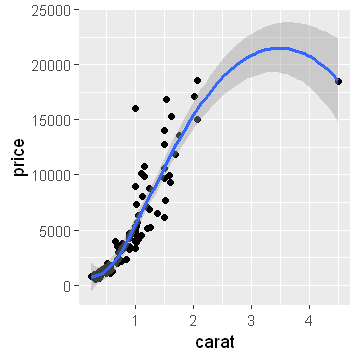

In [44]:
qplot(carat, price, data = dsmall,geom =c("point", "smooth"),method = "loess")

In [43]:
help(geom_smooth)

due to all kinds of bugs, the reference book will now be a new one:

[ggplot2-book](https://ggplot2-book.org/getting-started.html)